<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load dataset
df = pd.read_csv('samples_cancer.csv')

In [2]:
# Data preprocessing
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df = df.dropna()

X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
        'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class'].map({2: 0, 4: 1})

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Confusion Matrix:
 [[78  1]
 [ 5 53]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.94      0.99      0.96        79
   Malignant       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [4]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.9976


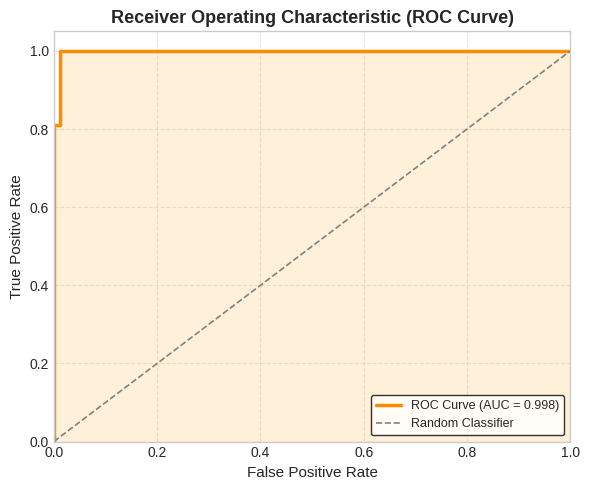

In [5]:
# Improved ROC Visualization
plt.figure(figsize=(6, 5))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(fpr, tpr, color='darkorange', linewidth=2.5, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.fill_between(fpr, tpr, color='orange', alpha=0.15)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.2, label='Random Classifier')

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('Receiver Operating Characteristic (ROC Curve)', fontsize=13, fontweight='bold')
plt.legend(frameon=True, edgecolor='black', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()